#### HW3<br>Yizhou Yao<br>DSC 478<br>Due: 5/21/2020

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

### problem 1.

#### a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [229]:
commu = pd.read_csv("communities.csv")
commu_clean = commu.drop([130])
commu_clean["OtherPerCap"] = commu_clean.OtherPerCap.astype("float")
pd.options.display.max_rows = commu.shape[1]
commu_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1993.0,28.683894,16.401661,1.0,12.00,34.00,42.00,56.0
population,1993.0,0.057612,0.126935,0.0,0.01,0.02,0.05,1.0
householdsize,1993.0,0.463437,0.163747,0.0,0.35,0.44,0.54,1.0
racepctblack,1993.0,0.179227,0.252870,0.0,0.02,0.06,0.23,1.0
racePctWhite,1993.0,0.753984,0.243807,0.0,0.63,0.85,0.94,1.0
racePctAsian,1993.0,0.153753,0.208905,0.0,0.04,0.07,0.17,1.0
racePctHisp,1993.0,0.144089,0.232531,0.0,0.01,0.04,0.16,1.0
agePct12t21,1993.0,0.424210,0.155234,0.0,0.34,0.40,0.47,1.0
agePct12t29,1993.0,0.493914,0.143584,0.0,0.41,0.48,0.54,1.0
agePct16t24,1993.0,0.336297,0.166540,0.0,0.25,0.29,0.36,1.0


In [230]:
y = commu_clean["ViolentCrimesPerPop"]
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])

In [231]:
# 20-80 test-train split:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

#### b) Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [232]:
# add column of 1s to x matrix for x0
x_train = np.array(x_train)
x_reg = np.array([np.concatenate((v,[1])) for v in x_train])
y_reg = np.array(y_train)

In [233]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [234]:
beta = standRegres(x_reg, y_reg)

In [235]:
# calculate predicted y values:
xMat = np.mat(x_reg)
y_pred = np.array(xMat*beta).flatten()

In [236]:
# compute RSME:
err = abs(y_pred - y_reg)
sse = np.dot(err, err)
rmse = np.sqrt(sse/len(err))
print(rmse)

0.12752697697956913


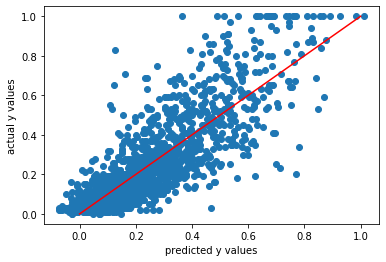

In [316]:
# plot correlation between predicted and actual y values
yPredArr = np.array(y_pred).flatten()
plt.plot(yPredArr, y_reg, 'o')
plt.plot([0,1],[0,1], 'r-')
plt.xlabel("predicted y values")
plt.ylabel("actual y values")
plt.show()

In [238]:
def cross_validate(X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        beta = standRegres(X[train], y[train])
        xTest = np.array([np.concatenate((v,[1])) for v in x[test]])
        p = np.array(np.mat(xTest)*beta).flatten()
        e = p - y[test]
        rmse = np.sqrt(np.dot(e,e)/len(e))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [239]:
# perform 10-fold corss validation
y = commu_clean["ViolentCrimesPerPop"]
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])
x = np.array(x)
x_crossV = np.array([np.concatenate((v,[1])) for v in x])
y_crossV = np.array(y)
cross_validate(x_crossV, y_crossV, 10, True)

Fold  1 RMSE: 0.1455
Fold  2 RMSE: 0.1431
Fold  3 RMSE: 0.1570
Fold  4 RMSE: 0.1408
Fold  5 RMSE: 0.1309
Fold  6 RMSE: 0.1236
Fold  7 RMSE: 0.1270
Fold  8 RMSE: 0.1243
Fold  9 RMSE: 0.1302
Fold 10 RMSE: 0.1367


0.13589812838129495

In [322]:
# Comparing cross-validation and training rsme
print("cross-validation RMSE = {}\n".format(cross_validate(x_crossV, y_crossV, 10, False)))
print("training RMSE = {}\n".format(rmse))

cross-validation RMSE = 0.13589812838129495

training RMSE = 0.12752697697956913



we can see the cross-validation and training RMSE are very similar.

#### c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.neg_mean_absolute_error). In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

In [324]:
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

In [330]:
def optimalPercentile(X_train, y_train, model):
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X_train, y_train)
        scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring="neg_mean_absolute_error")
        print("%2d  %0.4f" % (i, abs(scores).mean()))
        results = np.append(results, abs(scores).mean())
    optimal_percentile_ind = np.where(results == results.min())[0][0]
    print("\n")
    print("Optimal percentile of features is:{}".format(percentiles[optimal_percentile_ind]))
    return percentiles[optimal_percentile_ind], results

In [331]:
commu_clean = commu.drop([130])
commu_clean["OtherPerCap"] = commu_clean.OtherPerCap.astype("float")
y = commu_clean["ViolentCrimesPerPop"]
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [337]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
linreg = LinearRegression()
lfit = linreg.fit(x_train, y_train)
bestperct, results = optimalPercentile(x_train, y_train, lfit)

 1  0.1131
 6  0.1016
11  0.1014
16  0.1015
21  0.0995
26  0.0987
31  0.0978
36  0.0973
41  0.0969
46  0.0977
51  0.0976
56  0.0981
61  0.0987
66  0.0988
71  0.0990
76  0.0989
81  0.0986
86  0.0981
91  0.0983
96  0.0974


Optimal percentile of features is:41


In [338]:
# select top 41 percentile of features
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=bestperct)
x_train_fs = fs.fit_transform(x_train, y_train)
np.set_printoptions(suppress=True, precision=2, linewidth=120)
# list the selected features and their weights
for i in range(len(x.columns.values)):
    if fs.get_support()[i]:
        print("%10s  %3.2f" % (x.columns.values[i], fs.scores_[i]))

population  229.60
racepctblack  992.16
racePctWhite  1304.88
 numbUrban  223.62
 medIncome  341.31
  pctWWage  170.55
pctWInvInc  761.06
pctWPubAsst  783.22
 medFamInc  374.43
 perCapInc  214.97
NumUnderPov  361.96
PctPopUnderPov  569.49
PctLess9thGrade  296.03
PctNotHSGrad  461.06
PctBSorMore  169.04
PctUnemployed  532.36
 PctEmploy  196.38
MalePctDivorce  580.34
FemalePctDiv  693.86
TotalPctDiv  677.23
PctFam2Par  1596.84
PctKids2Par  1901.30
PctYoungKids2Par  1269.98
PctTeen2Par  1231.32
  NumIlleg  399.83
  PctIlleg  1856.85
PctLargHouseFam  240.01
PctPersOwnOccup  600.10
PctPersDenseHous  348.81
PctHousLess3BR  446.48
  MedNumBR  237.21
HousVacant  314.72
PctHousOccup  167.39
PctHousOwnOcc  448.76
PctVacantBoarded  489.30
PctHousNoPhone  485.84
PctWOFullPlumb  229.04
MedRentPctHousInc  173.17
NumInShelters  246.13
 NumStreet  176.24


In [339]:
def measure_performance(x, y, model):
    from sklearn import metrics    
    y_pred = model.predict(x)   
    MAE = metrics.mean_absolute_error(y, y_pred)
    return MAE
def cross_validate_fs(X, y, n):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    f = 1
    mae = []
    for train,test in kf.split(X):
        X_train_fs = fs.fit_transform(X[train], y[train])
        X_test_fs = fs.fit_transform(X[test], y[test])
        linreg = LinearRegression()
        linfit = linreg.fit(X_train_fs, y[train])
        mae.append(measure_performance(X_test_fs, y[test], linfit))
    return mae

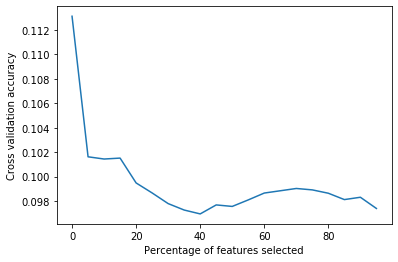

In [341]:
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(range(0, 100, 5),results)

#### d) Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [201]:
def measure_performance(x, y, model):
    from sklearn import metrics    
    y_pred = model.predict(x)   
    MAE = metrics.mean_absolute_error(y, y_pred)
    return MAE
def calc_params(X, y, model, param_values, param_name, K):
    from sklearn.model_selection import KFold
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print(param_name, ' = ', param_value)
        
        # set model parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):            
            fitmodel = model.fit(X[train], y[train])
            k_train_scores[j] = measure_performance(X[train], y[train], fitmodel)
            k_test_scores[j] = measure_performance(X[test], y[test], fitmodel)
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation absolute mean error")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores


(array([0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]),
 array([0.1 , 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]))

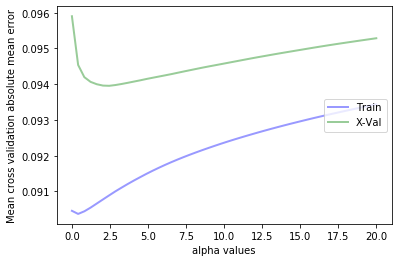

In [202]:
# ridge regression model selection
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])
y = commu_clean["ViolentCrimesPerPop"]
ridge = Ridge()
alphalist = np.linspace(.01,20,50)
calc_params(x, y, ridge, alphalist, 'alpha', 5)

(array([0.11, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18,
        0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18,
        0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]),
 array([0.11, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18,
        0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18,
        0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]))

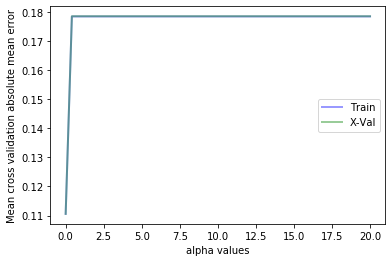

In [204]:
# lasso regression model selection
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])
y = commu_clean["ViolentCrimesPerPop"]
lasso = Lasso()
alphalist = np.linspace(.01,20,50)
calc_params(x, y, lasso, alphalist, 'alpha', 5)

#### Choose ridge regression since the mean absolute error is smaller than lasso.

#### e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a brief summary of your findings from the above experiments.

In [207]:
# feature scaling
from sklearn.preprocessing import StandardScaler
x = commu_clean.drop(columns=["ViolentCrimesPerPop", "state", "communityname"])
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

In [214]:
# grid search
from sklearn.model_selection import GridSearchCV
sgd = SGDRegressor()
parameters = {
    'penalty' : ['l1', 'l2'],
    'alpha' : np.arange(0.001, 10, 0.001),
}
gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)
gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 19998 candidates, totalling 99990 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 99990 out of 99990 | elapsed: 17.7min finished


({'alpha': 0.003, 'penalty': 'l2'}, 0.6283986483806008)

### Problem 2

#### a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [287]:
def cosineSimDist(x, D):
    # first find the vector norm for each instance in D as wel as the norm for vector x
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    return dists

#### b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.


In [291]:
# load the data and transform into np arrays
classes = pd.read_table("newsgroups5/classes.txt", sep=" ")
classes = classes.iloc[:, 1]
matrix = pd.read_table("newsgroups5/matrix.txt", sep=",")
terms = pd.read_table("newsgroups5/terms.txt", sep="\n")

In [292]:
# transform the data
classes = np.array(classes)
# take the transpose of matrix so that it's DT
DT = np.array(matrix.T)
terms = np.array(terms).flatten()

In [283]:
terms

array(['aargh', 'aaron', 'aaronc', ..., 'zw', 'zx', 'zz'], dtype=object)

In [284]:
classes

array([0, 1, 1, ..., 3, 4, 2], dtype=int64)

In [294]:
DT.shape

(2500, 9327)

In [297]:
DT

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [298]:
DT_train, DT_test, y_train, y_test = train_test_split(DT, classes, test_size=0.2, random_state=33)

In [299]:
DT_train.shape

(2000, 9327)

In [301]:
y_train.shape

(2000,)

In [304]:
DT_test.shape

(500, 9327)

In [305]:
y_test.shape

(500,)

#### c) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster.]

In [315]:
DF = pd.DataFrame([(DT_train!=0).sum(0)]).T
NMatrix = np.ones(np.shape(DT_train.T), dtype=float)*DT_train.shape[0]
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
train_tfidf = np.array((DT_train * IDF.T))

C:\Users\Victor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Victor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


2000